# H2o

![](https://i1.wp.com/datasmarts.net/es/wp-content/uploads/2019/09/1_u7swL7CrX0UW_lIScu1eDQ.png?fit=802%2C352&ssl=1)


[H2O](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html#) es una plataforma de código abierto, en memoria, distribuida, rápida y escalable de aprendizaje automático y análisis predictivo que permite la construcción de modelos de aprendizaje automático de manera sencilla y accesible. 

H2o cuenta con un producto de pago y otro de código abierto, para este análisis solo se tiene en cuenta las herramientas gratuitas que ofrece la plataforma.

El código de H2O está escrito en Java. H2O,  utiliza un almacén distribuido de clave/valor para acceder y referenciar datos, modelos, objetos, etc., en todos los nodos y máquinas. Los algoritmos se implementan de manera distribuida mediante el uso del framework Map/Reduce de H2O y  el de Java Fork/Join para el multihilo. Los datos se leen en paralelo, se distribuyen por todo el clúster y se almacenan en memoria en formato de columnas comprimidas. El analizador de datos de H2O tiene la capacidad de detectar el esquema de los datos de entrada y admite la ingesta de datos de múltiples fuentes en varios formatos.

Cuenta con una REST API e incorpora funcionalidades visuales (accediendo al servidor desde el navegador) para facilitar el uso del ML a personas no especializadas.

## Instalación

Para instalar la API de H20 en python para poder comunicarnos con el servidor Java, se necesita instalar los siguientes requisitos:

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future


Por último, para instalar h2o

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 164.8 MB 27.3 MB/s eta 0:00:01
  Created wheel for h2o: filename=h2o-3.32.1.1-py2.py3-none-any.whl size=164840229 sha256=a218ca60314828ee48f9142790596d6488e31d48f7879a52a374e365265e4d91
  Stored in directory: /root/.cache/pip/wheels/85/cb/f5/a72d41b4676331c29bbc5bb881bc2ac2fea8a10a4960f3488d
Successfully built h2o


Es importante destacar que para poder utilizar H2O debe de encontrarse un [servidor](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html) ejecutandolo.
<img src="http://docs.h2o.ai/h2o/latest-stable/h2o-docs/_images/h2o_stack.png" alt="Drawing" style="width: 500px;"/>


## Pruebas

In [3]:
import h2o
from h2o.automl import H2OAutoML

El servidor H2O para realizar las pruebas , esta siendo ejecutado en el host, mientras que Jupyter Notebook  esta ejecutando dentro de un contenedor Docker.

In [7]:
#h2o.init(ip="host.docker.internal")
h2o.init(ip="192.168.1.51",port=54325) #IP java server

df = h2o.upload_file("./titanic/train.csv")
train, test = df.split_frame([0.7], seed=42)

Checking whether there is an H2O instance running at http://192.168.1.51:54325 . connected.


H2O_cluster_uptime:,29 mins 56 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,alejandro
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.541 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
train.head(2)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,nan,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,nan,71.2833,C85,C


In [9]:
y = "Survived"

ignore = ["Survived", "PassengerId", "Name"] 

x = list(set(train.names) - set(ignore))

In [10]:
splits = df.split_frame(ratios=[0.7], seed=1)

train = splits[0]

test = splits[1]

In [11]:
y = "Survived" 

x = df.columns 

x.remove(y) 

x.remove("PassengerId")

x.remove("Name")

A continuación, ejecutamos AutoML.

Los únicos parámetros necesarios para ejecutar AutoML en H2O son, ytraining_frame, y max_runtime_secs, que nos permiten entrenar el AutoML durante una cantidad máxima de segundos y/o max_models, que entrenaría un número máximo de modelos, max_runtime_secs tiene un valor por defecto, mientras que max_models no. Para esta tarea, estableceremos una restricción de número de modelos. 

La segunda línea de código tiene los parámetros que necesitamos para entrenar nuestro modelo. Por ahora, sólo pasaremos x, y, junto a los datos de entrenamiento.

Una vez que el proceso de AutoML haya terminado, se puede comprobar los resultados en la tabla de clasificación (leaderboard).

In [12]:
#H2OAutoML(nfolds=5, max_runtime_secs=3600, max_models=None, stopping_metric='AUTO', stopping_tolerance=None, stopping_rounds=3, seed=None, project_name=None)

aml = H2OAutoML(max_models=25, max_runtime_secs_per_model=30, seed=42)

%time aml.train(x=x, y=y, training_frame=train)

#aml = H2OAutoML(max_runtime_secs=120, seed=1)

#aml.train(x=x,y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 3.71 s, sys: 354 ms, total: 4.06 s
Wall time: 1min 21s


In [13]:
lb = aml.leaderboard
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210413_202418,0.125775,0.354647,0.125775,0.252186,0.24989
StackedEnsemble_BestOfFamily_AutoML_20210413_202418,0.125904,0.354829,0.125904,0.25613,0.249983
GBM_3_AutoML_20210413_202418,0.126132,0.355151,0.126132,0.252695,0.25241
GBM_2_AutoML_20210413_202418,0.126334,0.355435,0.126334,0.250513,0.250022
GBM_grid__1_AutoML_20210413_202418_model_1,0.12909,0.359291,0.12909,0.244046,0.255114
DeepLearning_grid__1_AutoML_20210413_202418_model_1,0.13119,0.362201,0.13119,0.267682,0.256033
GBM_1_AutoML_20210413_202418,0.132232,0.363637,0.132232,0.250702,0.258319
DRF_1_AutoML_20210413_202418,0.132756,0.364357,0.132756,0.246284,0.258116
XRT_1_AutoML_20210413_202418,0.134163,0.366283,0.134163,0.268316,0.257887
GBM_4_AutoML_20210413_202418,0.135242,0.367752,0.135242,0.262284,0.261469


También se puede imprimir el leaderboard con otro tipo de datos como puede ser el tiempo de entrenamiento, de cada modelo y el tiempo que tarda cada modelo en predecir cada fila, en milisegundos:

In [14]:
from h2o.automl import get_leaderboard

lb2 = get_leaderboard(aml, extra_columns='ALL')

lb2.head(rows=lb2.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210413_202418,0.125775,0.354647,0.125775,0.252186,0.24989,155,0.100879,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210413_202418,0.125904,0.354829,0.125904,0.25613,0.249983,130,0.049878,StackedEnsemble
GBM_3_AutoML_20210413_202418,0.126132,0.355151,0.126132,0.252695,0.25241,185,0.018523,GBM
GBM_2_AutoML_20210413_202418,0.126334,0.355435,0.126334,0.250513,0.250022,200,0.013191,GBM
GBM_grid__1_AutoML_20210413_202418_model_1,0.12909,0.359291,0.12909,0.244046,0.255114,150,0.013817,GBM
DeepLearning_grid__1_AutoML_20210413_202418_model_1,0.13119,0.362201,0.13119,0.267682,0.256033,2660,0.015859,DeepLearning
GBM_1_AutoML_20210413_202418,0.132232,0.363637,0.132232,0.250702,0.258319,188,0.010395,GBM
DRF_1_AutoML_20210413_202418,0.132756,0.364357,0.132756,0.246284,0.258116,208,0.012884,DRF
XRT_1_AutoML_20210413_202418,0.134163,0.366283,0.134163,0.268316,0.257887,200,0.013865,DRF
GBM_4_AutoML_20210413_202418,0.135242,0.367752,0.135242,0.262284,0.261469,115,0.01232,GBM


Para coger los hiper-parametros de cada uno de los modelos de la tabla de clasificación hay que ejecutar lo siguiente:

In [15]:
# Get model ids for all models in the AutoML Leaderboard

model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model

se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_BestOfFamily" in mid][0])

# Get the Stacked Ensemble metalearner model

metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.coef()

/usr/local/lib/python3.7/site-packages/h2o/estimators/stackedensemble.py:836: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


{'Intercept': -0.013165336461905383,
 'GBM_3_AutoML_20210413_202418': 0.3988927139256192,
 'DeepLearning_grid__1_AutoML_20210413_202418_model_1': 0.3266477664816687,
 'DRF_1_AutoML_20210413_202418': 0.0,
 'XRT_1_AutoML_20210413_202418': 0.1110768840054754,
 'XGBoost_grid__1_AutoML_20210413_202418_model_6': 0.09662306131745091,
 'GLM_1_AutoML_20210413_202418': 0.07010965935503054}

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


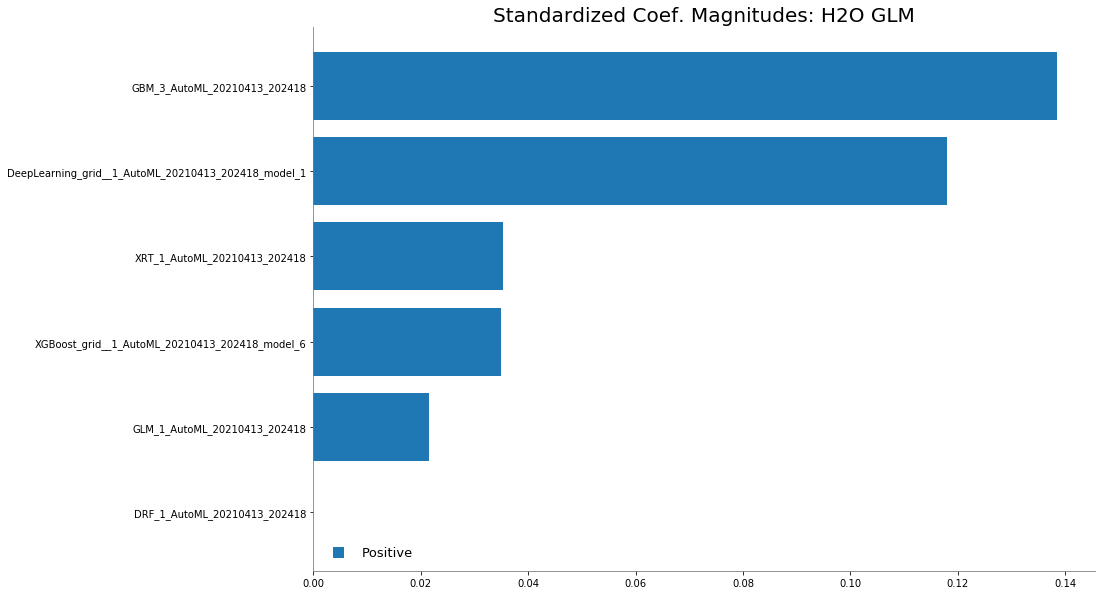

In [16]:
metalearner.std_coef_plot()

Ahora vamos a comprobar el rendimiento en nuestro dataset de pruebas

In [17]:
aml.leader.model_performance(test_data=test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.1326209848661906
RMSE: 0.36417164204011077
MAE: 0.2657143365490268
RMSLE: 0.25429087989275706
R^2: 0.44774970764111877
Mean Residual Deviance: 0.1326209848661906
Null degrees of freedom: 271
Residual degrees of freedom: 262
Null deviance: 65.480753521366
Residual deviance: 36.07290788360384
AIC: 244.3918538022507


In [ ]:
#%matplotlib inline
#aml.leader.model_performance(test_data=test).plot()

In [18]:
# Lastly, let's make some predictions on our test set.


pred = aml.predict(test)

pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
0.558313
0.0433985
0.331343
0.854634
0.825895
0.170872
0.114915
0.153237
0.509455
0.164644


También puede guardar y descargar el modelo y utilizarlo para desplegarlo en producción.

In [ ]:
h2o.save_model(aml.leader, path="./output")

### Ventajas:

    - Muy intuitivo y con muchas opciones personalizadas para construir modelos
    
    - El uso de H20 Flow en la interfaz web permite desarrollar y compartir rápidamente el modelo 

    - Más rápido que otros frameworks
    
    - Cuenta con una gran cantidad de documentación

 
### Contras:

    - No cuenta con muchas opciones de DL 